# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ilham Aly Abdillah
- **Email:** ilhamalyabdillah@gmail.com
- **ID Dicoding:** ilhamalyabdillah

## Menentukan Pertanyaan Bisnis

- Berapa rata rata peminjaman sepeda berdasarkan kondisi cuaca?
- Apakah ada pola musiman dalam jumlah sepeda yang disewa berdasarkan bulan (Month)?
- Bagaimana hubungan antara suhu udara (temp) dengan jumlah sepeda yang disewa? Apakah suhu ekstrem mempengaruhi penyewaan sepeda?
- Bagaimana distribusi peminjaman sepeda selama musim panas, musim semi, musim gugur, dan musim dingin?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile


## Data Wrangling

### Gathering Data

Import Data dari Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path ke file ZIP di Google Drive
zip_file_path = '/content/drive/MyDrive/Bikesharing.zip'

# Path direktori tujuan untuk mengekstrak file
extract_to = '/content/drive/My Drive/Download/extracted_data'

# Memastikan direktori tujuan ada, jika tidak ada maka buat foldernya
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Membuka dan mengekstrak file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset berhasil diekstrak ke {extract_to}")


Dataset berhasil diekstrak ke /content/drive/My Drive/Download/extracted_data


In [4]:
files = os.listdir(extract_to)
print("Files in extracted folder:", files)

Files in extracted folder: ['Readme.txt', 'day.csv', 'hour.csv']


Membaca Files CSV (Load Tabel)

In [5]:
csv_file_path = os.path.join(extract_to, 'day.csv')
# Membaca file CSV untuk dianalisis
day = pd.read_csv(csv_file_path)
print(day.head())
print("jumlah baris di dataset day :", day.shape[0])


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
jumlah baris di dataset da

In [6]:
csv_file_path = os.path.join(extract_to, 'hour.csv')

# Membaca file CSV untuk dianalisis
hour = pd.read_csv(csv_file_path)
print(hour.head())
print("Jumlah baris di dataset hour :", hour.shape[0])

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
Jumlah baris di dataset hour : 17379


**Insight:**
- jumlah baris di dataset day : 731
- Jumlah baris di dataset hour : 17379

### Assessing Data

Menilai data dari kedua dataset

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


 Terdapat tipe data yang perlu diperbaiki adalah: dteday -> object -> datetime

 Tidak terdapat missing value

In [8]:
day.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan dalam statistik

In [9]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan dalam statistik

In [10]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


 terdapat tipe data yang perlu diperbaiki adalah: dteday -> object -> datetime

 Tidak terdapat missing value

In [11]:
print("Jumlah duplikasi dataset day: ", day.duplicated().sum())
print("Jumlah duplikasi dataset hour: ", hour.duplicated().sum())

Jumlah duplikasi dataset day:  0
Jumlah duplikasi dataset hour:  0


Tidak terdapat duplikasi data artinya setiap data unique

### Cleaning Data

In [12]:
# Mengubah nama judul kolom supaya lebih mudah dipahami dan dibaca
day.rename(columns={
    'dteday': 'Dateday',
    'yr': 'Year',
    'mnth': 'Month',
    'weathersit': 'Weather_Cond',
    'cnt': 'Count',
    'hum' : 'Humidity',
},inplace=True)

print(day.head())

hour.rename(columns={
    'dteday': 'Dateday',
    'yr': 'Year',
    'mnth': 'Month',
    'weathersit': 'Weather_Cond',
    'cnt': 'Count',
    'hr' : 'Hour',
    'hum' : 'Humidity',
},inplace=True)

print(hour.head())

   instant     Dateday  season  Year  Month  holiday  weekday  workingday  \
0        1  2011-01-01       1     0      1        0        6           0   
1        2  2011-01-02       1     0      1        0        0           0   
2        3  2011-01-03       1     0      1        0        1           1   
3        4  2011-01-04       1     0      1        0        2           1   
4        5  2011-01-05       1     0      1        0        3           1   

   Weather_Cond      temp     atemp  Humidity  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   

   Count  
0    985  
1    801  
2   1349  
3   1562  
4

In [13]:
day['Dateday'] = pd.to_datetime(day.Dateday)

In [14]:
hour['Dateday'] = pd.to_datetime(hour.Dateday)

In [15]:
print(day.info())
print(hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   Dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   Year          731 non-null    int64         
 4   Month         731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   Weather_Cond  731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  Humidity      731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  Count         731 non-null    int64     

Tipe data dan beberapa kolom sudah disesuaikan selanjutnya adalah mengubah beberapa kolom menjadi sebuah data angka dengan keterangan.

In [16]:
# Mapping seasons, weekdays, and weather conditions to integers
day['Season'] = day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day['Weekday'] = day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day['Weather_Cond'] = day['Weather_Cond'].map({1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow'})

hour['Season'] = hour['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour['Weekday'] = hour['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour['Weather_Cond'] = hour['Weather_Cond'].map({1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow'})


In [17]:
# One-hot encoding untuk season, weekday, and weather conditions
day_encoded = pd.get_dummies(day, columns=['season', 'weekday', 'Weather_Cond'])
hour_encoded = pd.get_dummies(hour, columns=['season', 'weekday', 'Weather_Cond'])

print(day_encoded.head())
print(hour_encoded.head())

   instant    Dateday  Year  Month  holiday  workingday      temp     atemp  \
0        1 2011-01-01     0      1        0           0  0.344167  0.363625   
1        2 2011-01-02     0      1        0           0  0.363478  0.353739   
2        3 2011-01-03     0      1        0           1  0.196364  0.189405   
3        4 2011-01-04     0      1        0           1  0.200000  0.212122   
4        5 2011-01-05     0      1        0           1  0.226957  0.229270   

   Humidity  windspeed  ...  weekday_0  weekday_1  weekday_2 weekday_3  \
0  0.805833   0.160446  ...      False      False      False     False   
1  0.696087   0.248539  ...       True      False      False     False   
2  0.437273   0.248309  ...      False       True      False     False   
3  0.590435   0.160296  ...      False      False       True     False   
4  0.436957   0.186900  ...      False      False      False      True   

  weekday_4  weekday_5  weekday_6  Weather_Cond_Clear/Partly Cloudy  \
0     Fal

## Exploratory Data Analysis (EDA)

### Explore ...

Memvisualisasikan distribusi variabel seperti temp, humidity, windspeed, dan count menggunakan histogram atau boxplot.

Tujuan: Mengetahui apakah data berdistribusi normal, ada pencilan (outliers), dan hubungan antara variabel.

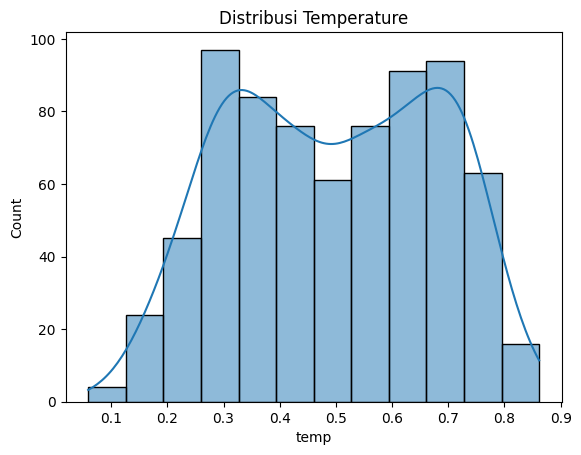

In [18]:
# Distribusi variabel numerik
sns.histplot(day['temp'], kde=True)
plt.title('Distribusi Temperature')
plt.show()

Berdasarkan visualisasi distribusi temperatur, terlihat bahwa pola suhu memiliki karakteristik bimodal dengan dua puncak utama sekitar 30% dan 70% dari skala suhu maksimum. Rentang suhu yang luas, dari 0.1 hingga 0.9, menunjukkan bahwa sistem bike sharing beroperasi dalam berbagai kondisi cuaca. Distribusi ini sedikit miring ke arah suhu rendah, dengan frekuensi terendah pada suhu ekstrem. Pola ini mengindikasikan variasi musiman yang signifikan dan berpotensi mempengaruhi pola peminjaman sepeda, di mana suhu moderat mungkin lebih mendorong penggunaan layanan dibandingkan dengan suhu ekstrem

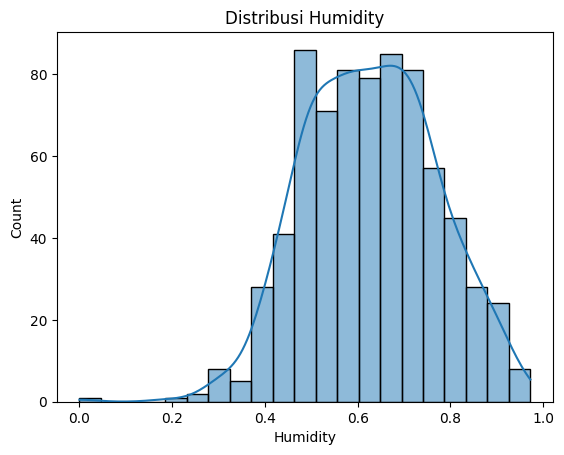

In [19]:
sns.histplot(day['Humidity'], kde=True)
plt.title('Distribusi Humidity')
plt.show()

Frekuensi untuk kelembaban di bawah 0.4 sangat rendah, sedangkan penurunan frekuensi untuk kelembaban di atas 0.8 lebih gradual, menunjukkan bahwa kondisi lembab lebih sering terjadi dibandingkan kondisi kering. Ini mengindikasikan bahwa lingkungan lembab dapat mempengaruhi kenyamanan pengguna dan berpotensi terkait dengan jumlah peminjaman sepeda.

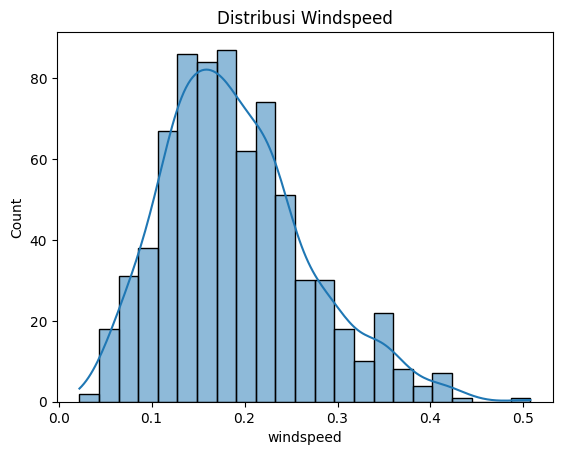

In [20]:
sns.histplot(day['windspeed'], kde=True)
plt.title('Distribusi Windspeed')
plt.show()

Kecepatan angin rendah hingga sedang (0.1-0.2) mungkin merupakan kondisi yang paling nyaman untuk bersepeda, yang bisa menjelaskan frekuensi tertinggi pada rentang ini.

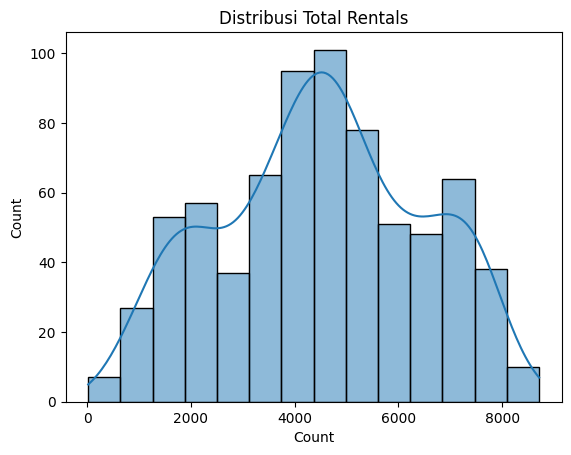

In [21]:
sns.histplot(day['Count'], kde=True)
plt.title('Distribusi Total Rentals')
plt.show()

Distribusi yang melebar ini menunjukkan bahwa sistem bike sharing mengalami fluktuasi permintaan yang signifikan, yang bisa disebabkan oleh berbagai faktor seperti cuaca, hari dalam seminggu (hari kerja vs. akhir pekan), musim, atau acara-acara khusus.

Menghitung korelasi antara variabel numerik dan tampilkan dalam bentuk heatmap.

Tujuan: Mendeteksi hubungan kuat antara variabel

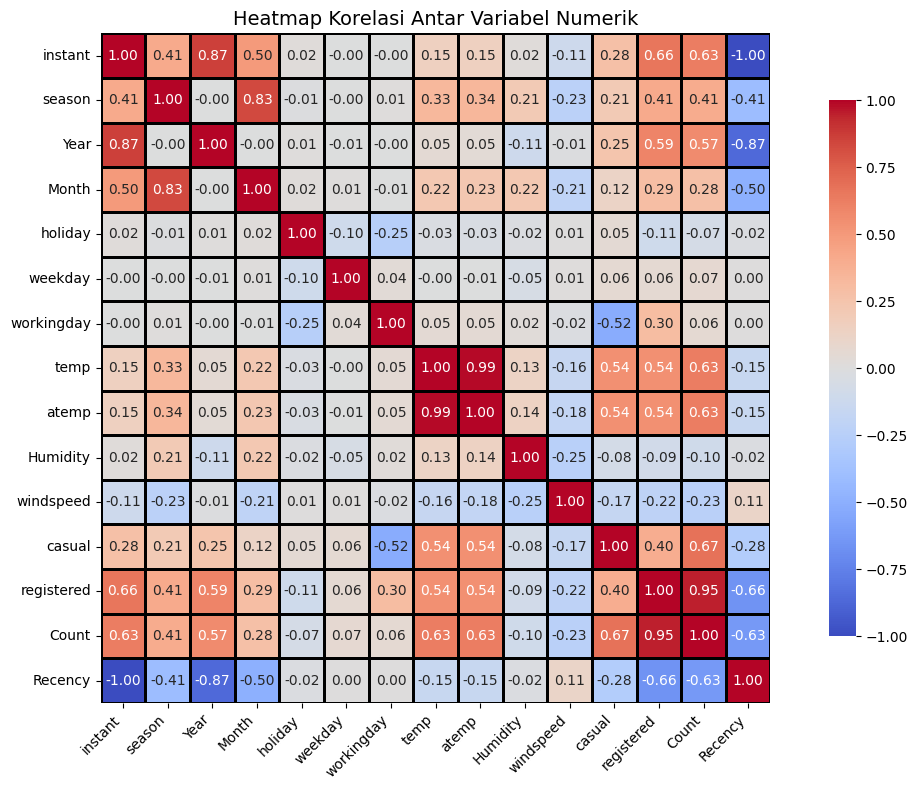

In [32]:
# Hitung matriks korelasi untuk kolom numerik
corr_matrix = day.select_dtypes(include=['float64', 'int64']).corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black',
            fmt='.2f', annot_kws={"size": 10}, square=True, cbar_kws={"shrink": 0.8})  # Menambah grid
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=14)
plt.tight_layout()
plt.show()



*   Korelasi tertinggi (0.95) terlihat antara 'Count' (total peminjaman) dengan 'registered' (pengguna terdaftar), menunjukkan bahwa pengguna terdaftar sangat mempengaruhi jumlah total peminjaman.
* 'Temp' (temperatur) dan 'atemp' (temperatur yang dirasakan) memiliki korelasi sangat kuat (0.99), menandakan kedua variabel ini hampir identik dalam pengaruhnya.
* 'Count' juga berkorelasi positif cukup kuat dengan 'temp' dan 'atemp' (0.63), mengindikasikan bahwa peminjaman sepeda cenderung meningkat saat suhu naik.
* 'Year' memiliki korelasi positif moderat (0.57) dengan 'Count', menunjukkan adanya tren peningkatan peminjaman dari tahun ke tahun.
* 'Humidity' dan 'windspeed' memiliki korelasi negatif lemah dengan 'Count' (-0.1 dan -0.23), mengisyaratkan sedikit penurunan peminjaman saat kelembaban atau kecepatan angin meningkat.
* 'Holiday' dan 'workingday' memiliki korelasi sangat lemah dengan 'Count', menunjukkan pengaruh minimal terhadap jumlah peminjaman.
* 'Casual' (pengguna kasual) juga berkorelasi positif cukup kuat (0.67) dengan 'Count', tapi tidak sekuat pengguna terdaftar.






Visualisasi variabel kategorikal seperti season, weekday, Weather_Cond terhadap Count untuk melihat tren berdasarkan musim, hari, atau kondisi cuaca.

Tujuan: Mengidentifikasi pola musiman atau pola terkait cuaca/hari.

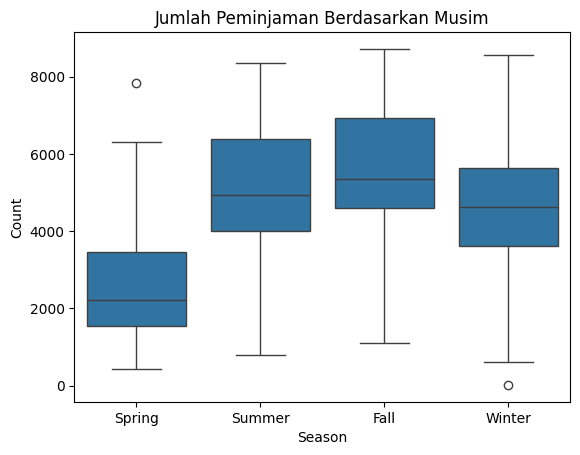

In [23]:
# Visualisasi hubungan antara season dan total rentals
sns.boxplot(x='Season', y='Count', data=day)
plt.title('Jumlah Peminjaman Berdasarkan Musim')
plt.show()

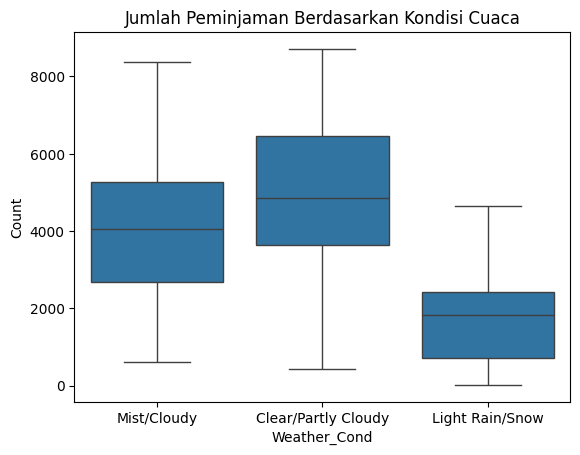

In [24]:
# Visualisasi hubungan antara Weather_Cond dan total rentals
sns.boxplot(x='Weather_Cond', y='Count', data=day)
plt.title('Jumlah Peminjaman Berdasarkan Kondisi Cuaca')
plt.show()

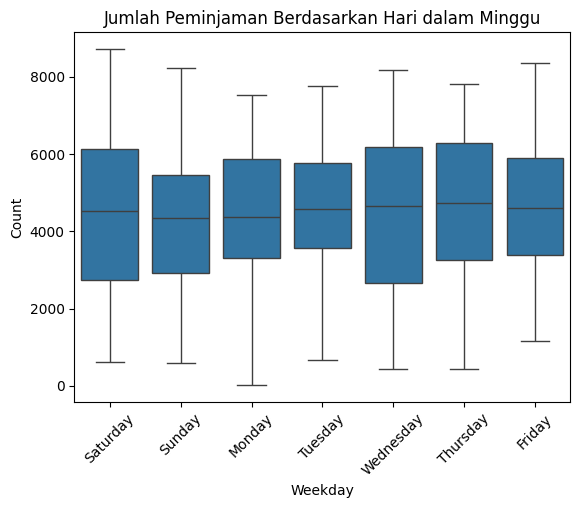

In [25]:
# Visualisasi hubungan antara weekday dan total rentals
sns.boxplot(x='Weekday', y='Count', data=day)
plt.title('Jumlah Peminjaman Berdasarkan Hari dalam Minggu')
plt.xticks(rotation=45)
plt.show()

 Analisis tren waktu dengan memplot jumlah peminjaman (Count) berdasarkan waktu (harian, bulanan, jam).

Tujuan: Mengetahui apakah ada pola musiman atau waktu spesifik yang lebih tinggi.

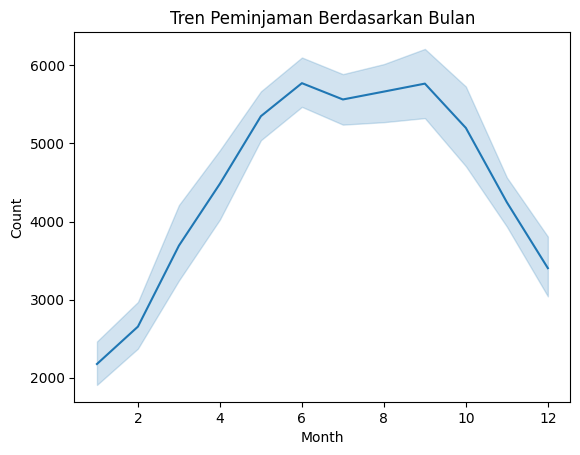

In [26]:
# Tren jumlah peminjaman berdasarkan bulan
sns.lineplot(x='Month', y='Count', data=day)
plt.title('Tren Peminjaman Berdasarkan Bulan')
plt.show()

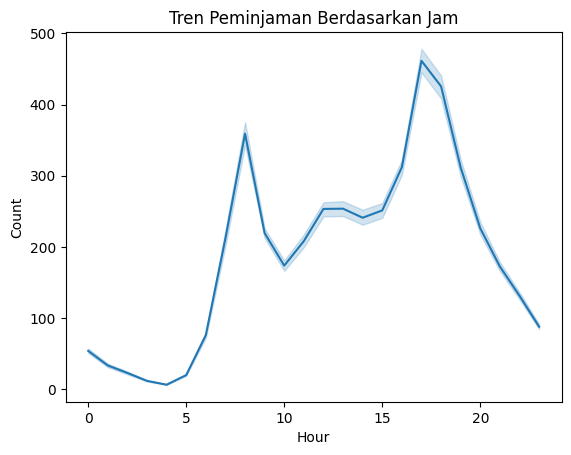

In [27]:
# Tren jumlah peminjaman berdasarkan jam
sns.lineplot(x='Hour', y='Count', data=hour)
plt.title('Tren Peminjaman Berdasarkan Jam')
plt.show()

In [28]:
# Menghitung hari terakhir dalam dataset
latest_day = day['Dateday'].max()

# Menghitung recency (hari sejak penyewaan terakhir)
day['Recency'] = (latest_day - day['Dateday']).dt.days
print(day[['Dateday', 'Recency']].head())

     Dateday  Recency
0 2011-01-01      730
1 2011-01-02      729
2 2011-01-03      728
3 2011-01-04      727
4 2011-01-05      726


Outliers Detection

Menggunakan boxplot untuk memvisualisasikan dan mendeteksi outliers pada variabel numerik seperti Count, temp, humidity, dan windspeed.

Tujuan: Mengetahui apakah ada data pencilan yang perlu diatasi.

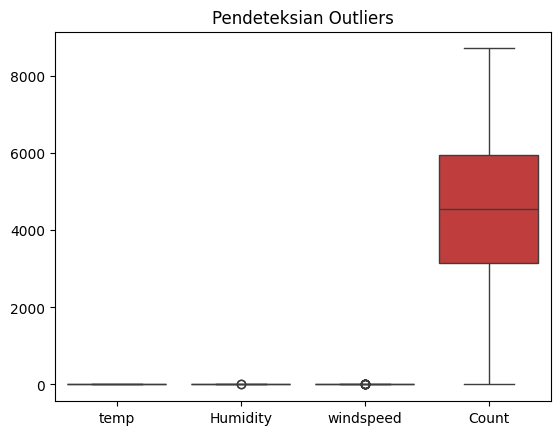

In [29]:
# Mendeteksi outliers
sns.boxplot(data=day[['temp', 'Humidity', 'windspeed', 'Count']])
plt.title('Pendeteksian Outliers')
plt.show()

Semua variabel ini tampaknya memiliki outliers (ditunjukkan oleh titik-titik di luar whisker).

Namun, distribusi nilainya sangat rapat di sekitar nilai rendah, sehingga sulit untuk mengidentifikasi pola tanpa skala yang lebih baik. Hal ini bisa terjadi karena skala yang tidak proporsional dibandingkan dengan variabel Count.

Karena perbedaan skala yang signifikan antara Count dan variabel lain (temp, Humidity, dan windspeed), akan lebih baik jika visualisasi outliers dilakukan untuk setiap variabel secara terpisah. Ini akan memberikan gambaran yang lebih jelas mengenai distribusi masing-masing variabel.

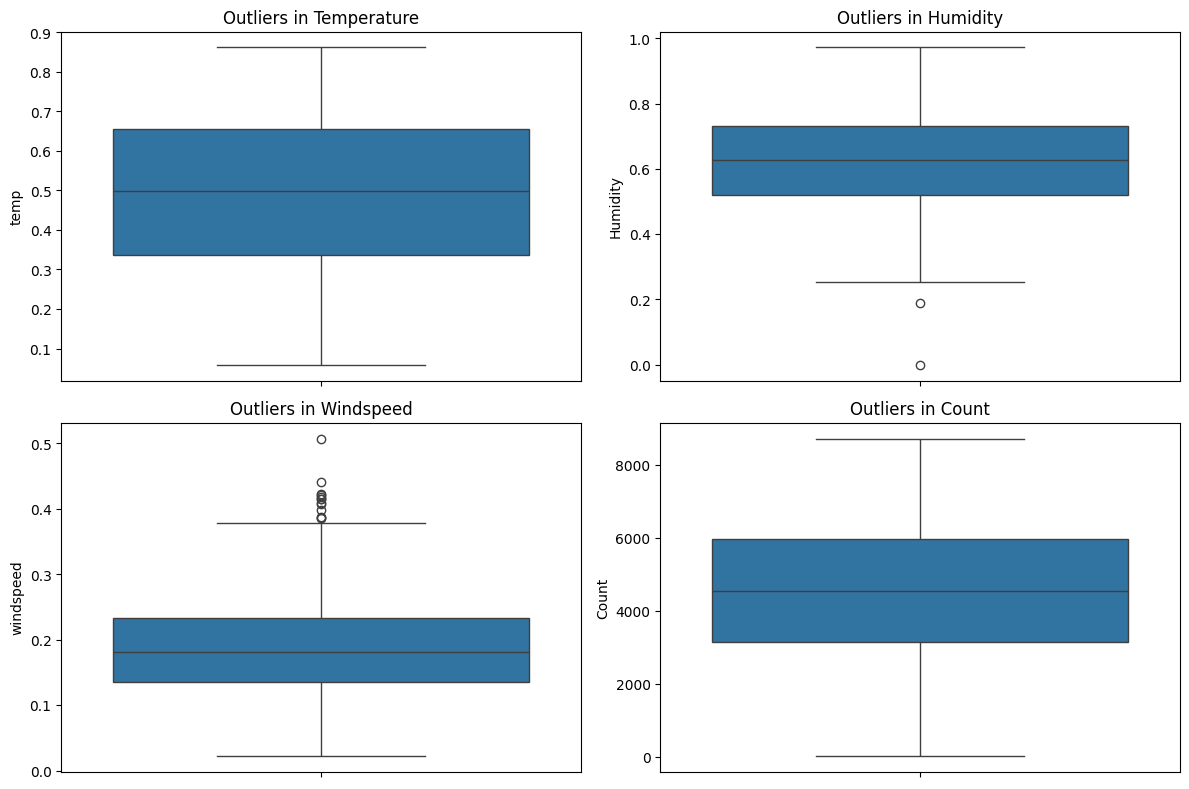

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(data=day['temp'], ax=axes[0, 0])
axes[0, 0].set_title('Outliers in Temperature')

sns.boxplot(data=day['Humidity'], ax=axes[0, 1])
axes[0, 1].set_title('Outliers in Humidity')

sns.boxplot(data=day['windspeed'], ax=axes[1, 0])
axes[1, 0].set_title('Outliers in Windspeed')

sns.boxplot(data=day['Count'], ax=axes[1, 1])
axes[1, 1].set_title('Outliers in Count')

plt.tight_layout()
plt.show()

Terlihat ada beberapa outliers di variabel windspeed, terutama nilai yang berada di atas 0.4. Titik-titik ini berada jauh di atas batas atas (upper whisker) dari boxplot, yang menunjukkan bahwa beberapa kejadian kecepatan angin jauh lebih tinggi dibandingkan dengan sebagian besar data.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata rata peminjaman sepeda berdasarkan kondisi cuaca?

In [33]:
weather_effect = day.groupby('Weather_Cond')['Count'].mean().reset_index()
print(weather_effect)

          Weather_Cond        Count
0  Clear/Partly Cloudy  4876.786177
1      Light Rain/Snow  1803.285714
2          Mist/Cloudy  4035.862348


<ipython-input-34-ddfd9d9091b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather_Cond', y='Count', data=weather_effect, palette='Blues_d')


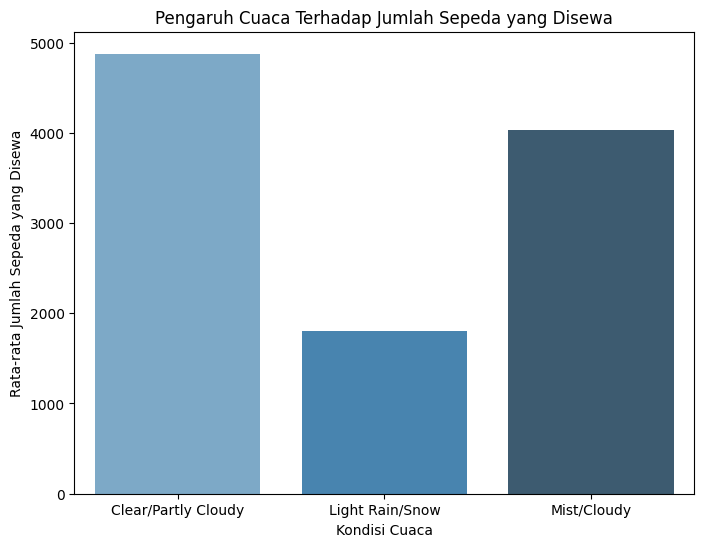

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x='Weather_Cond', y='Count', data=weather_effect, palette='Blues_d')
plt.title('Pengaruh Cuaca Terhadap Jumlah Sepeda yang Disewa')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.show()



*    Cuaca "Clear/Partly Cloudy" (Cerah/Berawan Sebagian) memiliki rata-rata jumlah sepeda yang disewa tertinggi, sekitar 4900 sepeda. Ini menunjukkan bahwa kondisi cuaca yang baik sangat mendorong penggunaan layanan bike sharing.
*   Kondisi "Light Rain/Snow" (Hujan Ringan/Salju) memiliki dampak negatif signifikan terhadap penyewaan sepeda, dengan rata-rata penyewaan turun drastis menjadi sekitar 1800 sepeda. Ini menunjukkan bahwa cuaca basah, bahkan jika ringan, sangat mempengaruhi keputusan orang untuk menyewa sepeda.
* Kondisi "Mist/Cloudy" (Berkabut/Berawan) menunjukkan tingkat penyewaan yang cukup tinggi, sekitar 4000 sepeda, meskipun tidak setinggi kondisi cerah. Ini mengindikasikan bahwa kabut atau awan tidak terlalu menghalangi orang untuk menyewa sepeda



### Pertanyaan 2: Apakah ada pola musiman dalam jumlah sepeda yang disewa berdasarkan bulan (Month)?

In [35]:
monthly_trend = day.groupby('Month')['Count'].mean().reset_index()
print(monthly_trend)

    Month        Count
0       1  2176.338710
1       2  2655.298246
2       3  3692.258065
3       4  4484.900000
4       5  5349.774194
5       6  5772.366667
6       7  5563.677419
7       8  5664.419355
8       9  5766.516667
9      10  5199.225806
10     11  4247.183333
11     12  3403.806452


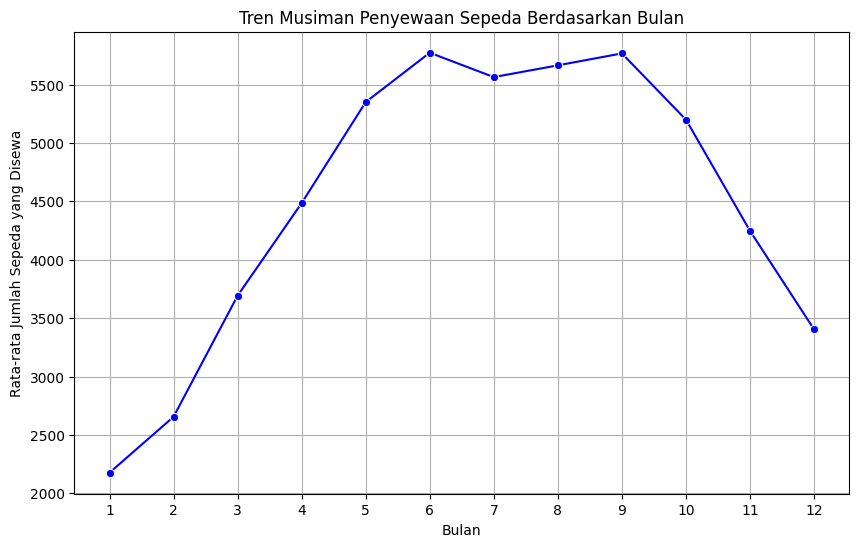

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Count', data=monthly_trend, marker='o', color='b')
plt.title('Tren Musiman Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()



*   Penyewaan sepeda mencapai puncaknya pada bulan 6-9 (Juni-September), dengan jumlah rata-rata penyewaan tertinggi sekitar 5750 sepeda per hari pada bulan Juni
*    Bulan 12-2 (Desember-Februari) menunjukkan tingkat penyewaan terendah, dengan titik terendah pada bulan Januari (sekitar 2200 sepeda per hari)
*    Penurunan yang cukup cepat terlihat dari September hingga Desember
*    Bulan April-Mei dan Oktober menunjukkan tingkat penyewaan menengah, yang mungkin mencerminkan musim peralihan (spring dan fall).



## Pertanyaan 3 : Bagaimana hubungan antara suhu udara (temp) dengan jumlah sepeda yang disewa? Apakah suhu ekstrem mempengaruhi penyewaan sepeda?

In [37]:
# Koefisien korelasi antara suhu dan jumlah sepeda
corr_temp_count = day['temp'].corr(day['Count'])
print(f'Korelasi antara suhu dan jumlah sepeda yang disewa: {corr_temp_count}')

Korelasi antara suhu dan jumlah sepeda yang disewa: 0.6274940090334918


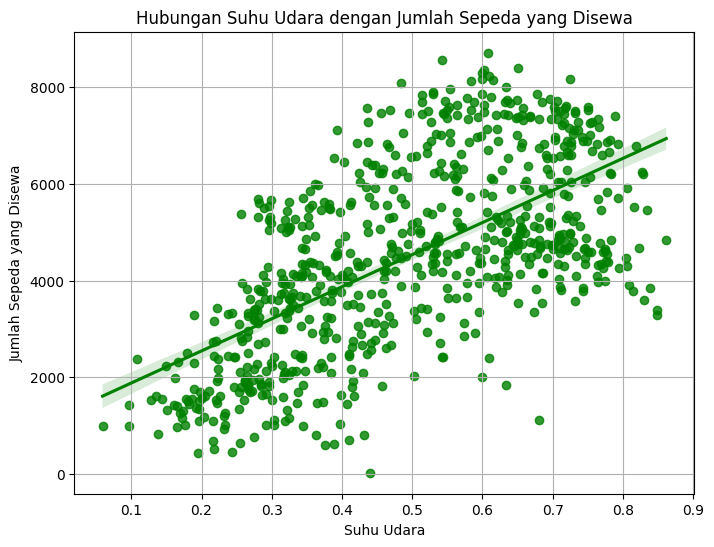

In [38]:
plt.figure(figsize=(8,6))
sns.regplot(x='temp', y='Count', data=day, color='g')
plt.title('Hubungan Suhu Udara dengan Jumlah Sepeda yang Disewa')
plt.xlabel('Suhu Udara')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.grid(True)
plt.show()

* Terlihat adanya tren positif yang jelas antara suhu udara dan jumlah sepeda yang disewa. Semakin tinggi suhu, semakin banyak sepeda yang disewa.
*  Meskipun ada tren positif, terdapat variasi yang cukup besar dalam jumlah penyewaan pada suhu yang sama, ditunjukkan oleh sebaran vertikal titik-titik data.
* Penyewaan sepeda tampak mencapai puncaknya pada suhu sekitar 0.6-0.8 pada skala yang ditampilkan, yang mungkin mewakili suhu yang nyaman untuk bersepeda.
* Sebagian besar data terkonsentrasi pada rentang suhu 0.3-0.7, menunjukkan bahwa ini adalah kondisi suhu yang paling umum.
* Suhu Ekstrem:
  *   Pada suhu rendah (di bawah 0.2), jumlah penyewaan cenderung rendah.
  *   Pada suhu tinggi (di atas 0.8), ada sedikit penurunan dalam jumlah penyewaan maksimum, meskipun data pada rentang ini terbatas


.

## Pertanyaan 4 : Bagaimana distribusi peminjaman sepeda selama musim panas, musim semi, musim gugur, dan musim dingin?


<ipython-input-41-351500e8873e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season_label', y='Count', data=day, ci=None, palette='Set2')
<ipython-input-41-351500e8873e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_label', y='Count', data=day, ci=None, palette='Set2')


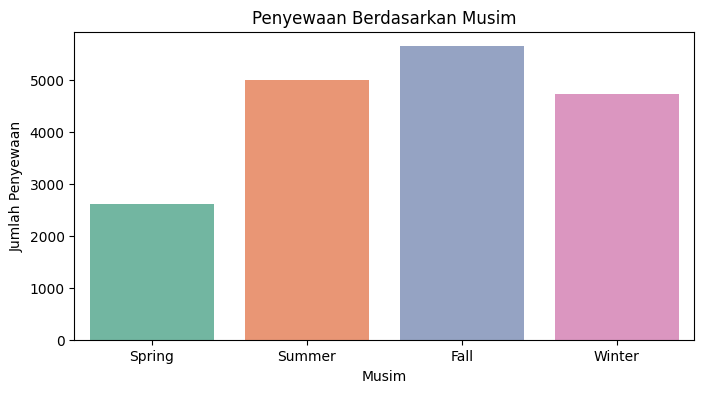

In [41]:
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day['season_label'] = day['season'].replace(season_labels)

# Visualisasi
plt.figure(figsize=(8, 4))
sns.barplot(x='season_label', y='Count', data=day, ci=None, palette='Set2')
plt.title('Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()



*   Pola Musiman: Grafik menunjukkan variasi yang jelas dalam jumlah penyewaan sepeda antar musim, mengonfirmasi pengaruh kuat faktor musiman terhadap penggunaan layanan bike sharing.
*   Musim Puncak: Musim gugur (Fall) muncul sebagai periode dengan jumlah penyewaan tertinggi, sekitar 5500 sepeda. Ini sedikit mengejutkan karena biasanya musim panas dianggap sebagai puncak aktivitas luar ruangan.
*   Musim Panas vs Musim Gugur: Musim panas (Summer) menempati posisi kedua dalam jumlah penyewaan, dengan sekitar 5000 sepeda, tidak jauh berbeda dari musim gugur. Ini menunjukkan bahwa kondisi cuaca hangat secara konsisten mendorong penggunaan sepeda.
*    Musim Dingin: Meskipun musim dingin (Winter) menunjukkan penurunan penyewaan dibandingkan musim panas dan gugur, jumlahnya masih cukup tinggi (sekitar 4800 sepeda). Ini mengindikasikan bahwa layanan tetap populer bahkan dalam cuaca yang lebih dingin.



## Conclusion

- Conclution pertanyaan 1 : Cuaca memiliki pengaruh signifikan terhadap penggunaan layanan bike sharing. Kondisi cerah atau berawan sebagian menghasilkan rata-rata penyewaan tertinggi sekitar 4900 sepeda, menunjukkan bahwa cuaca baik mendorong penggunaan sepeda. Sebaliknya, hujan ringan atau salju mengurangi minat, dengan rata-rata penyewaan turun drastis menjadi 1800 sepeda. Meskipun kabut atau awan tidak optimal seperti cuaca cerah, penyewaan tetap cukup tinggi, sekitar 4000 sepeda, menunjukkan bahwa kondisi ini tidak terlalu menghalangi pengguna.
- Conclution pertanyaan 2 : Penyewaan sepeda mencapai puncaknya selama bulan Juni hingga September, dengan rata-rata tertinggi sekitar 5750 sepeda per hari pada bulan Juni. Sebaliknya, bulan Desember hingga Februari menunjukkan tingkat penyewaan terendah, terutama pada bulan Januari dengan hanya 2200 sepeda per hari. Penurunan tajam terjadi antara bulan September dan Desember. Bulan April-Mei dan Oktober menunjukkan tingkat penyewaan menengah, yang mungkin dipengaruhi oleh musim peralihan seperti musim semi dan gugur.
- Conclution pertanyaan 3 : Terdapat tren positif yang jelas antara suhu udara dan jumlah sepeda yang disewa, di mana semakin tinggi suhu, semakin banyak sepeda yang disewa. Meskipun demikian, terdapat variasi yang signifikan pada jumlah penyewaan untuk suhu yang sama, yang terlihat dari sebaran vertikal data. Penyewaan sepeda mencapai puncaknya pada suhu sekitar 0.6-0.8, yang mungkin merupakan suhu nyaman untuk bersepeda. Sebagian besar data terkonsentrasi pada rentang suhu 0.3-0.7, menunjukkan bahwa kondisi ini adalah yang paling umum. Pada suhu ekstrem, jumlah penyewaan cenderung rendah, baik pada suhu rendah (di bawah 0.2) maupun pada suhu tinggi (di atas 0.8), meskipun data untuk suhu tinggi terbatas.
- Conclution pertanyaan 4 :
Pola musiman menunjukkan pengaruh kuat terhadap penggunaan layanan bike sharing, dengan musim gugur (Fall) secara tak terduga muncul sebagai periode puncak penyewaan, mencapai sekitar 5500 sepeda, sedikit lebih tinggi dari musim panas (Summer) yang mencapai 5000 sepeda. Ini menegaskan bahwa cuaca hangat, baik di musim panas maupun gugur, secara konsisten mendorong penyewaan sepeda. Meskipun musim dingin (Winter) mengalami penurunan, jumlah penyewaan tetap cukup tinggi, sekitar 4800 sepeda, menunjukkan popularitas layanan bahkan dalam kondisi cuaca yang lebih dingin.

In [ ]:
day.to_csv("day.csv", index=False)